In [2]:
import os
import random
from ultralytics import YOLO
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

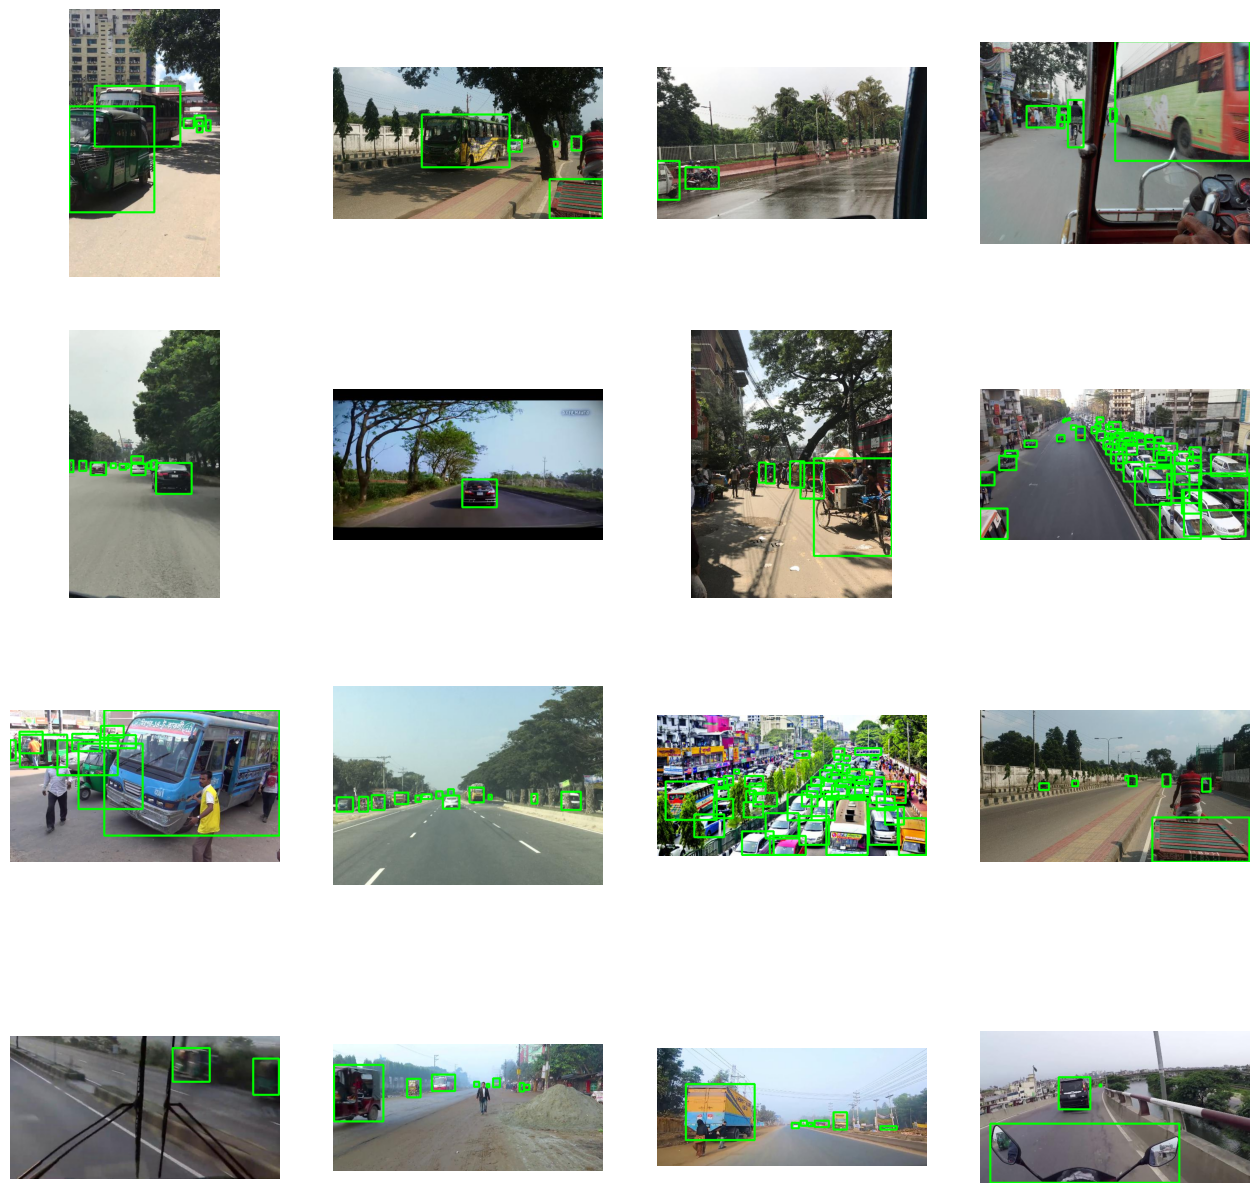

In [20]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Set paths
train_images = "trafic_data/train/images"
train_labels = "trafic_data/train/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()

In [7]:
h, w, c = image.shape

print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x229 and 3 channels.


In [ ]:
input_img = 'istockphoto-155287967-612x612.jpg'

result_predict = model.predict(input_img, imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

display(Image.fromarray(plot))



image 1/1 /Users/hrushikeshnayak/Desktop/img to text/trafic_data/train/images/04_jpg.rf.c0b83432c4d09c7cbeaac18e14c4a54a.jpg: 320x416 8 persons, 2 cars, 7 buss, 240.4ms
Speed: 1.0ms preprocess, 240.4ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 416)


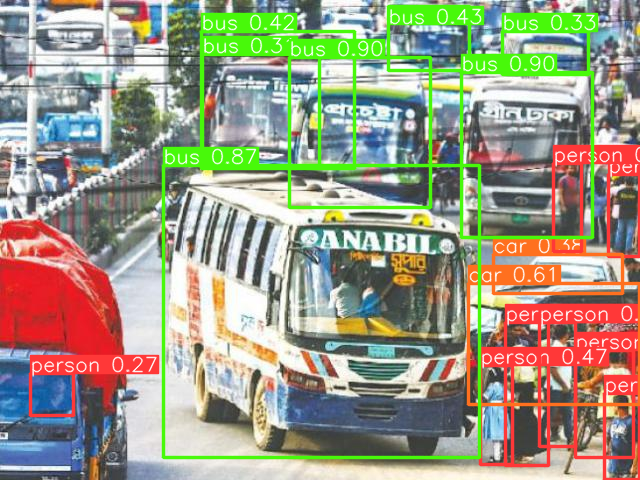

In [6]:
input_img = 'trafic_data/train/images/04_jpg.rf.c0b83432c4d09c7cbeaac18e14c4a54a.jpg'

model = YOLO('yolov8x.pt')

result_predict = model.predict(input_img, imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

display(Image.fromarray(plot))


0: 256x416 5 trucks, 36.3ms
Speed: 1.7ms preprocess, 36.3ms inference, 6.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 person, 1 bicycle, 1 truck, 67.1ms
Speed: 1.2ms preprocess, 67.1ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 9 persons, 4 cars, 5 motorcycles, 1 truck, 57.6ms
Speed: 4.3ms preprocess, 57.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 7 persons, 5 trucks, 32.8ms
Speed: 1.4ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 3 persons, 3 buss, 3 trucks, 33.0ms
Speed: 1.3ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 2 persons, 7 cars, 32.0ms
Speed: 1.7ms preprocess, 32.0ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 416x256 5 cars, 2 trucks, 85.5ms
Speed: 1.3ms preprocess, 85.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 256)

0: 416x256 1 pers

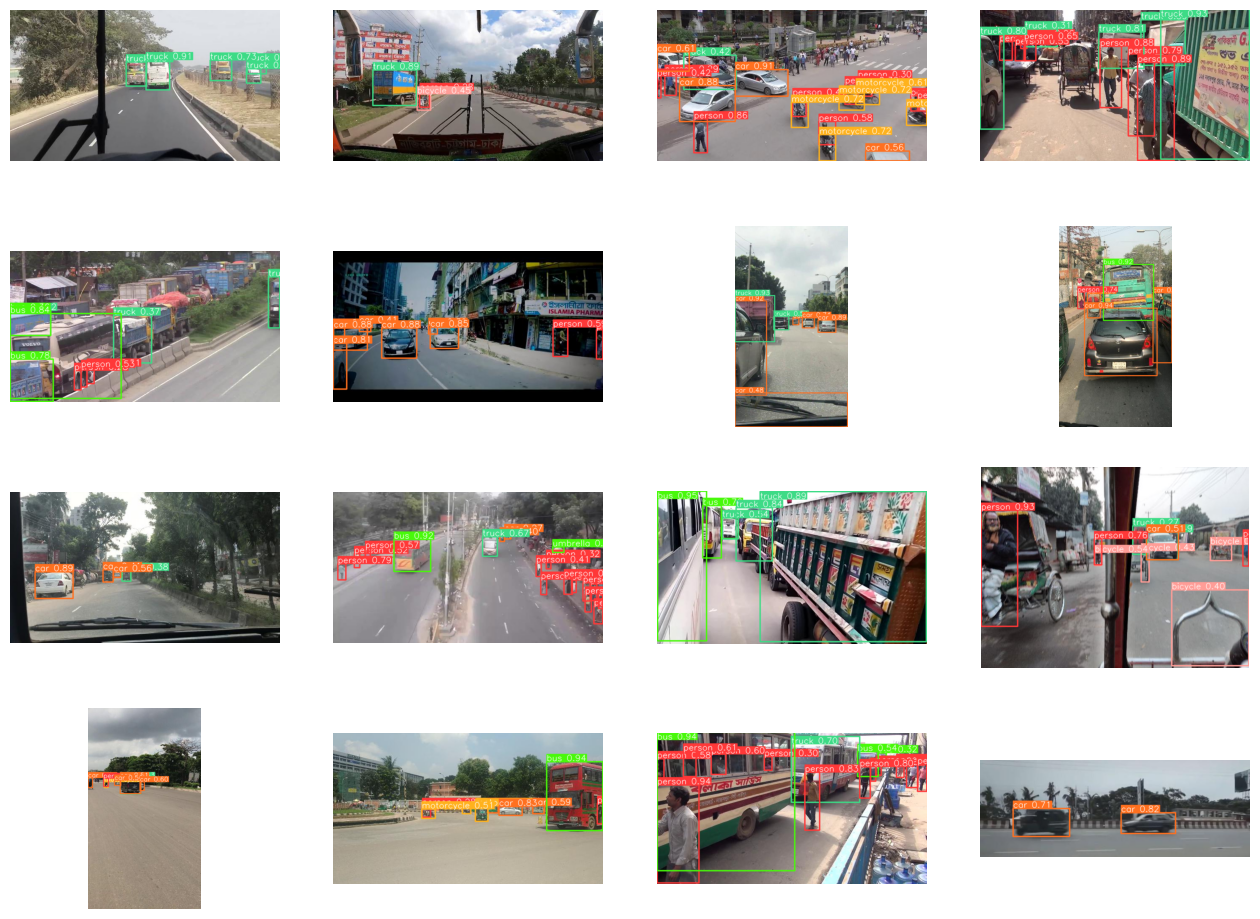

In [11]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    result_predict = model.predict(image, imgsz=(416))

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

    axs[row,col].imshow(plot)
    axs[row,col].axis('off')

plt.show()

In [23]:
test_img = '/content/drive/MyDrive/datasets/trafic_data/train/images/01_jpg.rf.8d8a2f0f90d5b83893cd252acd832c93.jpg'

result_predict = model.predict(test_img, imgsz=(416))


image 1/1 /content/drive/MyDrive/datasets/trafic_data/train/images/01_jpg.rf.8d8a2f0f90d5b83893cd252acd832c93.jpg: 288x416 2 persons, 5 cars, 2 buss, 1 truck, 2 benchs, 1 chair, 41.8ms
Speed: 1.9ms preprocess, 41.8ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 416)


In [29]:
model = YOLO('yolov8x.pt')


model.train(data = '/content/drive/MyDrive/datasets/trafic_data/data_1.yaml',
            epochs = 30,
            imgsz = h,
            seed = 42,
            batch = 8,
            workers = 4)


Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/datasets/trafic_data/data_1.yaml, epochs=30, time=None, patience=50, batch=8, imgsz=229, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 102MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[229] must be multiple of max stride 32, updating to [256]


train: Scanning /content/drive/MyDrive/datasets/trafic_data/train/labels... 2704 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2704/2704 [16:57<00:00,  2.66it/s]


train: New cache created: /content/drive/MyDrive/datasets/trafic_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/datasets/trafic_data/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [01:52<00:00,  2.67it/s]

val: WARNING ⚠️ /content/drive/MyDrive/datasets/trafic_data/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/datasets/trafic_data/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


val: New cache created: /content/drive/MyDrive/datasets/trafic_data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       2.6G      1.381      1.953      1.095         71        256: 100%|██████████| 338/338 [01:12<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]

                   all        300       2568      0.531      0.192      0.187      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.6G       1.41      1.555      1.118        136        256: 100%|██████████| 338/338 [01:04<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]


                   all        300       2568      0.493      0.187      0.191      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       2.6G      1.425      1.546      1.129        112        256: 100%|██████████| 338/338 [01:04<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.53it/s]


                   all        300       2568      0.615      0.208      0.218      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       2.6G      1.443        1.5      1.132        108        256: 100%|██████████| 338/338 [01:04<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.17it/s]

                   all        300       2568      0.571      0.201      0.216      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.62G      1.424      1.432      1.128        140        256: 100%|██████████| 338/338 [01:03<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.68it/s]


                   all        300       2568       0.51      0.236      0.234       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.63G      1.387      1.365      1.107        122        256: 100%|██████████| 338/338 [01:04<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.59it/s]


                   all        300       2568       0.56      0.242      0.241      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.61G      1.362      1.313      1.105        195        256: 100%|██████████| 338/338 [01:04<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.58it/s]


                   all        300       2568      0.566      0.273       0.28      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.61G      1.312      1.279      1.082        112        256: 100%|██████████| 338/338 [01:03<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]


                   all        300       2568       0.61      0.269      0.277      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.61G      1.302      1.227      1.073        162        256: 100%|██████████| 338/338 [01:04<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.79it/s]

                   all        300       2568      0.539      0.281      0.288      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.61G      1.284      1.179      1.063        112        256: 100%|██████████| 338/338 [01:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.55it/s]


                   all        300       2568      0.491      0.285      0.281      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.61G      1.263      1.147      1.056         97        256: 100%|██████████| 338/338 [01:04<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]


                   all        300       2568      0.563      0.295      0.296       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.6G       1.23      1.117      1.041         70        256: 100%|██████████| 338/338 [01:04<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]


                   all        300       2568       0.53      0.295      0.299       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       2.6G      1.225      1.086      1.039         94        256: 100%|██████████| 338/338 [01:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]


                   all        300       2568      0.654      0.272      0.308       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.59G      1.202      1.043      1.032         53        256: 100%|██████████| 338/338 [01:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]

                   all        300       2568       0.63        0.3       0.33      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.6G      1.186      1.027       1.03         54        256: 100%|██████████| 338/338 [01:03<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.38it/s]


                   all        300       2568      0.458      0.328      0.322       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.6G      1.177     0.9916      1.021         97        256: 100%|██████████| 338/338 [01:04<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.60it/s]


                   all        300       2568      0.569      0.311      0.321      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       2.6G      1.159     0.9658       1.01         87        256: 100%|██████████| 338/338 [01:04<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]


                   all        300       2568      0.454      0.359      0.341      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.6G      1.133     0.9484      1.007         98        256: 100%|██████████| 338/338 [01:05<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]


                   all        300       2568      0.667      0.331      0.368       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.6G      1.132     0.9242      1.002         82        256: 100%|██████████| 338/338 [01:04<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.55it/s]


                   all        300       2568        0.6      0.347      0.371      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.59G      1.111     0.9008      1.001        320        256: 100%|██████████| 338/338 [01:04<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.80it/s]

                   all        300       2568      0.519      0.361      0.371      0.217


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.61G      1.101      0.834     0.9732         46        256: 100%|██████████| 338/338 [01:04<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.07it/s]


                   all        300       2568      0.476      0.367      0.351      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       2.6G      1.089      0.814     0.9694         48        256: 100%|██████████| 338/338 [01:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]


                   all        300       2568      0.609      0.333      0.368      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.59G      1.072     0.7903     0.9604         46        256: 100%|██████████| 338/338 [01:03<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.40it/s]


                   all        300       2568      0.502      0.346      0.365      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.59G      1.054     0.7522     0.9591         64        256: 100%|██████████| 338/338 [01:02<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.06it/s]


                   all        300       2568      0.662      0.312       0.36      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.59G      1.035     0.7362     0.9528         65        256: 100%|██████████| 338/338 [01:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]


                   all        300       2568      0.574      0.339      0.359      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       2.6G      1.015     0.7213      0.944         88        256: 100%|██████████| 338/338 [01:03<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]


                   all        300       2568      0.595      0.332      0.371      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       2.6G      1.009     0.7016     0.9465        177        256: 100%|██████████| 338/338 [01:03<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]


                   all        300       2568      0.596      0.344      0.375      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       2.6G     0.9918     0.6794     0.9342         49        256: 100%|██████████| 338/338 [01:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]


                   all        300       2568      0.585      0.334      0.374      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.59G     0.9828     0.6615     0.9336         43        256: 100%|██████████| 338/338 [01:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]


                   all        300       2568      0.621      0.338      0.386      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.59G     0.9696     0.6521      0.925         85        256: 100%|██████████| 338/338 [01:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]


                   all        300       2568      0.415      0.385      0.383      0.227

30 epochs completed in 0.646 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68143791 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]


                   all        300       2568      0.616      0.336      0.385      0.236
               bicycle        300         32      0.292      0.125       0.15     0.0632
                   bus        300        425        0.8      0.412      0.565      0.361
                   car        300        842      0.817      0.592      0.706      0.466
               minibus        300          2      0.356        0.5      0.508      0.403
               minivan        300        110      0.419      0.382      0.352      0.244
             motorbike        300        335      0.746      0.442      0.493      0.176
                pickup        300        142      0.624      0.211      0.349      0.202
             policecar        300          1          1          0          0          0
              rickshaw        300        192      0.766      0.536      0.584      0.352
               scooter        300          1          0          0          0          0
                   su

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x783400b80820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044


image 1/1 /Users/hrushikeshnayak/Desktop/img to text/trafic_data/train/images/06_jpeg.rf.14bdc2005d8029bbe9f24fad4b6af7ea.jpg: 256x416 1 car, 9 trucks, 192.6ms
Speed: 1.4ms preprocess, 192.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 416)


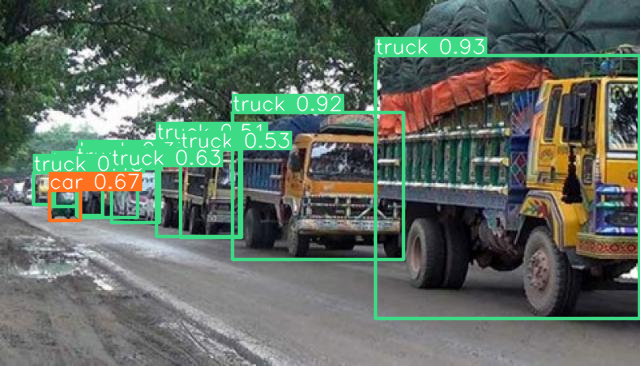

In [7]:
input_img = 'trafic_data/train/images/06_jpeg.rf.14bdc2005d8029bbe9f24fad4b6af7ea.jpg'

model = YOLO('yolov8x.pt')

result_predict = model.predict(input_img, imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

display(Image.fromarray(plot))
